# Análise das questões levantadas para as disciplinas do P4

#### Importando Bibliotecas

In [1]:
import pandas as pd
from statistics import mean, median, mode, stdev, variance
from os import listdir
from math import modf

In [2]:
import os
import sys
sys.path.append(os.path.abspath("util.py"))

import util
import util_extrator_padroes
import util_gerador_graficos

#### Abrindo Arquivos CSV

In [3]:
discentes = util.retorna_discentes()

disciplinas = util.retorna_componentes_com_semestre()

matriculas_realizadas = util.retorna_matriculas()

matriculas_geral = util.retorna_matriculas()

In [4]:
discentes.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
0,18511024,8.18,1985.1,CONCLUÍDO,1988.2
1,18511029,7.70,1985.1,CONCLUÍDO,1988.2
2,18511030,9.22,1985.1,CONCLUÍDO,1988.2
3,18511033,8.31,1985.1,CONCLUÍDO,1988.2
4,18511035,8.06,1985.1,CONCLUÍDO,1988.2


In [5]:
discentes_depois = util.retorna_discentes_depois(discentes=discentes)

discentes_depois.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
483,10611013,8.36,2006.1,CONCLUÍDO,2010.1
484,10611008,8.82,2006.1,CONCLUÍDO,2009.2
485,10611431,8.28,2006.1,CONCLUÍDO,2008.2
486,10611011,8.77,2006.1,CONCLUÍDO,2009.2
487,10611015,8.49,2006.1,CONCLUÍDO,2010.2


In [6]:
matriculas_discentes = discentes_depois['matricula'].to_list()

matriculas_discentes[:5]

[10611013, 10611008, 10611431, 10611011, 10611015]

In [7]:
disciplinas.head()

,codigo,nome,ch_total,semestre
0,1101101,COMPLEMENTOS EM FISICA GERAL I,30,NaN
1,1101107,ESTRUTURA DA MATÉRIA I,60,NaN
2,1101117,FISICA GERAL I,90,NaN
3,1101118,FISICA GERAL II,90,NaN
4,1101119,FISICA GERAL III,90,NaN


In [8]:
disciplinas.count()

codigo      291
nome        291
ch_total    291
semestre     62
dtype: int64

In [9]:
periodo_rec = 4

In [10]:
disciplinas = disciplinas[disciplinas['semestre'] == periodo_rec]
disciplinas.count()

codigo      11
nome        11
ch_total    11
semestre    11
dtype: int64

In [11]:
codigos_disciplinas = disciplinas['codigo'].to_list()

codigos_disciplinas[:5]

['1103176', '1103180', '1107108', '1107114', '1107196']

In [12]:
matriculas_realizadas.head()

,matricula,periodo_matricula,codigo_componente,descricao,media_final
0,10011003,2000.1,1103114,APROVADO,9.7
1,10011003,2000.1,1107137,APROVADO,10.0
2,10011003,2000.1,1103118,APROVADO,9.8
3,10011003,2000.1,1107136,APROVADO,10.0
4,10011003,2000.1,1101117,APROVADO,10.0


### Filtrando as matrículas nas quais os alunos obtiveram sucesso

In [13]:
matriculas_realizadas.count()

matricula            37767
periodo_matricula    37767
codigo_componente    37767
descricao            37767
media_final          35939
dtype: int64

In [14]:
aux = pd.DataFrame()

In [15]:
aux.empty

True

In [16]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVADO'])

In [17]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'DISPENSADO'])

In [18]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'MATRICULADO'])

In [19]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVEITADO'])

In [20]:
### Tratando disciplinas com mais de um registromatriculas_realizadas = None

matriculas_realizadas = aux

matriculas_realizadas.count()

matricula            33295
periodo_matricula    33295
codigo_componente    33295
descricao            33295
media_final          33256
dtype: int64

### Tratando disciplinas com mais de um registro

Disciplinas que precisam desse tratamento:

* LOGICA APLC A COMPUTACAO e LOGICA APLICADA A COMPUTACAO

* CALCULO NUMERICO (sem nenhuma matricula) e CALCULO NUMERICO e CALCULO NUMERICO

* INTRODUCAO AO PROC DIGITAL DE IMAGENS e INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS

* ARQUITETURA DE COMPUTADORES II e ARQUITETURA DE COMPUTADORES II

* ADM SIST DE INFORMACOES e ADMINISTRACAO DE SISTEMAS DE INFORMACAO

* CONSTRUCAO DE COMPILADORES I e CONSTRUÇÃO DE COMPILADORES I

* REDES DE COMPUTADORES I e REDES DE COMPUTADORES I

* ESTÁGIO SUPERVISIONADO e ESTAGIO SUPERVISIONADO

* FISICA APLICADA A COMPUTACAO I (de 60 creditos e de 90 creditos)

* FISICA APLICADA A COMPUTACAO II (de 60 creditos e de 90 creditos)

* CALCULO I (de 60 creditos e de 90 creditos)

* CALCULO II (de 60 creditos e de 90 creditos)

* CALCULO III (de 60 creditos e de 90 creditos)

* CIRCUITOS (de 60 creditos e de 90 creditos)

* INTRODUCAO A ALGEBRA LINEAR e ALGEBRA LIN GEO ANALITICA 

In [21]:
'''fisica1 = []
fisica1 = disciplinas[disciplinas['nome'] == 'FISICA APLICADA A COMPUTACAO I']['codigo'].to_list()
print(fisica1)

calc1 = []
calc1 = disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL I']['codigo'].to_list()
print(calc1)'''

'''fisica2 = []
fisica2 = disciplinas[disciplinas['nome'] == 'FISICA APLICADA A COMPUTACAO II']['codigo'].to_list()
print(fisica2)

calc2 = []
calc2 = disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL II']['codigo'].to_list()
print(calc2)

algebra = []
algebra.append(disciplinas[disciplinas['nome'] == 'INTRODUCAO A ALGEBRA LINEAR']['codigo'].iloc[0])
algebra.append(disciplinas[disciplinas['nome'] == 'ALGEBRA LIN GEO ANALITICA']['codigo'].iloc[0])
print(algebra)

logica = []
logica.append(disciplinas[disciplinas['nome'] == 'LOGICA APLC A COMPUTACAO']['codigo'].iloc[0])
logica.append(disciplinas[disciplinas['nome'] == 'LOGICA APLICADA A COMPUTACAO']['codigo'].iloc[0])
print(logica)'''

'''calc3 = []
calc3.append(disciplinas[disciplinas['nome'] == 'CALCULO DIF  E INTEGRAL III']['codigo'].iloc[0])
calc3.append(disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL III']['codigo'].iloc[0])
print(calc3)

cl = []
cl = disciplinas[disciplinas['nome'] == 'CIRCUITOS LOGICOS']['codigo'].to_list()
print(cl)'''

numerico = []
numerico = disciplinas[disciplinas['nome'] == 'CALCULO NUMERICO']['codigo'].to_list()
print(numerico)

pdi = []
pdi.append(disciplinas[disciplinas['nome'] == 'INTRODUCAO AO PROC DIGITAL DE IMAGENS']['codigo'].iloc[0])
pdi.append(disciplinas[disciplinas['nome'] == 'INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS']['codigo'].iloc[0])
print(pdi)

'''arq2 = []
arq2 = disciplinas[disciplinas['nome'] == 'ARQUITETURA DE COMPUTADORES II']['codigo'].to_list()
print(arq2)'''

'''redes = []
redes = disciplinas[disciplinas['nome'] == 'REDES DE COMPUTADORES I']['codigo'].to_list()
print(redes)

admsi = []
admsi.append(disciplinas[disciplinas['nome'] == 'ADM SIST DE INFORMACOES']['codigo'].iloc[0])
admsi.append(disciplinas[disciplinas['nome'] == 'ADMINISTRACAO DE SISTEMAS DE INFORMACAO']['codigo'].iloc[0])
print(admsi)

comp = []
comp.append(disciplinas[disciplinas['nome'] == 'CONSTRUCAO DE COMPILADORES I']['codigo'].iloc[0])
comp.append(disciplinas[disciplinas['nome'] == 'CONSTRUÇÃO DE COMPILADORES I']['codigo'].iloc[0])
print(comp)'''

'''estagio = []
estagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])
estagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])
print(estagio)'''

['1103176', '1107114', 'GDCOC0072']
['1107196', 'GDSCO0055']


"estagio = []\nestagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])\nestagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])\nprint(estagio)"

In [22]:
'''fisica1, matriculas_realizadas = util.mapeia_disciplina(fisica1.copy(), matriculas_realizadas)
calc1, matriculas_realizadas = util.mapeia_disciplina(calc1.copy(), matriculas_realizadas)'''

'''fisica2, matriculas_realizadas = util.mapeia_disciplina(fisica2.copy(), matriculas_realizadas)
calc2, matriculas_realizadas = util.mapeia_disciplina(calc2.copy(), matriculas_realizadas)
algebra, matriculas_realizadas = util.mapeia_disciplina(algebra.copy(), matriculas_realizadas)
logica, matriculas_realizadas = util.mapeia_disciplina(logica.copy(), matriculas_realizadas)'''

'''calc3, matriculas_realizadas = util.mapeia_disciplina(calc3.copy(), matriculas_realizadas)
cl, matriculas_realizadas = util.mapeia_disciplina(cl.copy(), matriculas_realizadas)'''

numerico_aux, matriculas_realizadas = util.mapeia_disciplina(numerico.copy(), matriculas_realizadas)
pdi_aux, matriculas_realizadas = util.mapeia_disciplina(pdi.copy(), matriculas_realizadas)

numerico_aux, matriculas_geral = util.mapeia_disciplina(numerico.copy(), matriculas_geral)
pdi_aux, matriculas_geral = util.mapeia_disciplina(pdi.copy(), matriculas_geral)

'''arq2, matriculas_realizadas = util.mapeia_disciplina(arq2.copy(), matriculas_realizadas)'''

'''redes, matriculas_realizadas = util.mapeia_disciplina(redes.copy(), matriculas_realizadas)
admsi, matriculas_realizadas = util.mapeia_disciplina(admsi.copy(), matriculas_realizadas)
comp, matriculas_realizadas = util.mapeia_disciplina(comp.copy(), matriculas_realizadas)'''

'''estagio, matriculas_realizadas = util.mapeia_disciplina(estagio.copy(), matriculas_realizadas)'''

Disciplina(s) ['1107114', 'GDCOC0072'] mapeadas para o código 1103176
Disciplina(s) ['GDSCO0055'] mapeadas para o código 1107196
Disciplina(s) ['1107114', 'GDCOC0072'] mapeadas para o código 1103176
Disciplina(s) ['GDSCO0055'] mapeadas para o código 1107196


'estagio, matriculas_realizadas = util.mapeia_disciplina(estagio.copy(), matriculas_realizadas)'

### Disciplinas que serão analisadas

In [23]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])
    
codigos_disciplinas.remove('1107114')
codigos_disciplinas.remove('GDCOC0072')
codigos_disciplinas.remove('GDSCO0055')

1103176
CALCULO NUMERICO
1103180
SERIES E EQUACOES DIF ORDINARIAS
1107108
ARQUITETURA DE COMPUTADORES I
1107114
CALCULO NUMERICO
1107196
INTRODUCAO AO PROC DIGITAL DE IMAGENS
1107199
LINGUAGENS FORMAIS E AUTOMATOS
1107204
ORDENACAO E RECUPERACAO DE DADOS
1108183
MODELOS PROBABILÍSTICOS P COMPUTAÇÃO
1404138
LINGUA INGLESA I
GDCOC0072
CALCULO NUMERICO
GDSCO0055
INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS


In [24]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])

1103176
CALCULO NUMERICO
1103180
SERIES E EQUACOES DIF ORDINARIAS
1107108
ARQUITETURA DE COMPUTADORES I
1107196
INTRODUCAO AO PROC DIGITAL DE IMAGENS
1107199
LINGUAGENS FORMAIS E AUTOMATOS
1107204
ORDENACAO E RECUPERACAO DE DADOS
1108183
MODELOS PROBABILÍSTICOS P COMPUTAÇÃO
1404138
LINGUA INGLESA I


### Gerando relatório

In [25]:
relatorio = []

for codigo in codigos_disciplinas:
    
    relatorio_disciplina = {'nome': None, 'rec': None, 'nao_rec': None, 'alunos_nao_rec': []}

    aux = matriculas_realizadas[matriculas_realizadas['codigo_componente'] == codigo]

    disciplina = disciplinas[disciplinas['codigo'] == codigo]['nome'].iloc[0]

    #periodo_recomendado = int(disciplinas[disciplinas['codigo'] == codigo]['semestre'].iloc[0])

    relatorio_disciplina['nome'] = disciplina

    matriculas = aux.count().iloc[0]
        
    #matriculas = 1

    rec = 0
    nao_rec = 0
    
    alunos_nao_rec = []

    for row in aux.iterrows():

        #print(row[1])
        #print()

        aluno = row[1]['matricula']

        if aluno not in matriculas_discentes:
            matriculas -= 1
            continue

        else:
                
            periodo_matricula = row[1]['periodo_matricula']
            periodo_ingresso = discentes_depois[discentes_depois['matricula'] == aluno]['periodo_ingresso'].iloc[0]

            periodo_cursou = util.retorna_tempo_graduacao(periodo_ingresso, periodo_matricula)

            #print('rec: {} matri: {} ingre: {} cursou: {}'.format(periodo_recomendado, periodo_matricula, periodo_ingresso, periodo_cursou))

            if periodo_cursou == periodo_rec:
                rec += 1

            else:
                nao_rec += 1
                alunos_nao_rec.append(aluno)
                    
            #matriculas += 1

    
    relatorio_disciplina['rec'] = rec/matriculas
    relatorio_disciplina['nao_rec'] = nao_rec/matriculas
    relatorio_disciplina['alunos_nao_rec'] = alunos_nao_rec
    print(matriculas)
    
    relatorio.append(relatorio_disciplina)

219
177
219
217
217
217
169
219


In [26]:
relatorio

[{'nome': 'CALCULO NUMERICO',
  'rec': 0.3242009132420091,
  'nao_rec': 0.6757990867579908,
  'alunos_nao_rec': [10611015,
   10611023,
   10611029,
   10621014,
   10621015,
   10621017,
   10621020,
   10621022,
   10621028,
   10621030,
   10621239,
   10621243,
   10621363,
   10621364,
   10711001,
   10711011,
   10711012,
   10711018,
   10711029,
   10711032,
   10711466,
   10711467,
   10711469,
   10721006,
   10721015,
   10721026,
   10811031,
   10821055,
   10821057,
   10821060,
   10821063,
   10821251,
   10821258,
   10821361,
   10911054,
   10911653,
   10921054,
   10921056,
   10921059,
   10921063,
   10921069,
   10921072,
   10921073,
   10921360,
   10921363,
   10921372,
   10921378,
   11011050,
   11011053,
   11011057,
   11011060,
   11011061,
   11011062,
   11011065,
   11011068,
   11011089,
   11011828,
   11011829,
   11011830,
   11011833,
   11011836,
   11021057,
   11021059,
   11021063,
   11021067,
   11021068,
   11021445,
   11021452,
   110

### Analisando CALCULO NUMERICO

In [27]:
codigo = codigos_disciplinas[0]

In [28]:
print(relatorio[0]['nome'])

alunos_nao_rec = relatorio[0]['alunos_nao_rec']

alunos_nao_rec

CALCULO NUMERICO


[10611015,
 10611023,
 10611029,
 10621014,
 10621015,
 10621017,
 10621020,
 10621022,
 10621028,
 10621030,
 10621239,
 10621243,
 10621363,
 10621364,
 10711001,
 10711011,
 10711012,
 10711018,
 10711029,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10721015,
 10721026,
 10811031,
 10821055,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911054,
 10911653,
 10921054,
 10921056,
 10921059,
 10921063,
 10921069,
 10921072,
 10921073,
 10921360,
 10921363,
 10921372,
 10921378,
 11011050,
 11011053,
 11011057,
 11011060,
 11011061,
 11011062,
 11011065,
 11011068,
 11011089,
 11011828,
 11011829,
 11011830,
 11011833,
 11011836,
 11021057,
 11021059,
 11021063,
 11021067,
 11021068,
 11021445,
 11021452,
 11021593,
 11021633,
 11111298,
 11111309,
 11111314,
 11111316,
 11111322,
 11118146,
 11118199,
 11118203,
 11118204,
 11118209,
 11121191,
 11121212,
 11121216,
 11121217,
 11121219,
 11121220,
 11121223,
 11121694,
 11121697,
 11121705,
 11121911,

In [29]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11210   10611015             2010.1           1103176  APROVADO          7.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
493   10611023  8.25            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11413   10611023             2009.1           1103176  APROVADO          9.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
492   10611029  8.05            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11557   10611029             2008.1           1103176  APROVADO          9.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
505   10621014  7.83            2006.2  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
563   10911653  6.68            2009.1  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15353   10911653             2013.1           1103176  APROVADO          7.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
567   10921054  7.97            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15380   10921054             2011.2           1103176  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
574   10921056  8.18            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15458   10921056             2013.1           1103176  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
575   10921059  8.11            2009.2  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente   descricao  media_final
18102   11021593             2016.1           1103176  INDEFERIDO          NaN
18105   11021593             2016.1           1103176  INDEFERIDO          NaN
18109   11021593             2016.2           1103176  REP. FALTA          0.5
18113   11021593             2017.1           1103176   REPROVADO          1.8
18114   11021593             2017.1           1103176  INDEFERIDO          NaN
18120   11021593             2017.2           1103176    APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
612   11021633  7.83            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18153   11021633             2012.2           1103176  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
621   11111298  6.65            2011.1  CONCLUÍDO             2015.2
       matricul

       matricula  periodo_matricula codigo_componente descricao  media_final
20160   11121911             2014.1           1103176  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
632   11121912  6.34            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20252   11121912             2014.2           1103176  APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
640   11121914  6.04            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20371   11121914             2017.1           1103176  APROVADO          5.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
636   11128089  5.35            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20435   11128089             2015.2       

       matricula  periodo_matricula codigo_componente   descricao  media_final
22522   11318739             2016.1           1103176    APROVADO          7.0
22524   11318739             2016.1           1103176  INDEFERIDO          NaN
22528   11318739             2016.1           1103176  INDEFERIDO          NaN

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
682   11328275  7.92            2013.2  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
22740   11328275             2016.1           1103176  INDEFERIDO          NaN
22757   11328275             2016.2           1103176    APROVADO          5.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
681   11328386  7.36            2013.2  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22826   11328386             2017.1           1103176  APROVADO          6.4

     matricula

       matricula  periodo_matricula codigo_componente   descricao  media_final
23550   11427671             2014.2           1103176  DISPENSADO          7.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
701   11508370  7.86            2015.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
23811   11508370             2015.2           1103176  INDEFERIDO          NaN
23816   11508370             2016.1           1103176  DISPENSADO          5.0
23818   11508370             2016.1           1103176  INDEFERIDO          NaN

     matricula   cra  periodo_ingresso         descricao  periodo_conclusao
702   11514334  8.49            2015.2  ATIVO - FORMANDO             2018.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
23944   11514334             2015.2           1103176  DISPENSADO          8.5



In [30]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [31]:
aux

[0.12837837837837837,
 0.02027027027027027,
 0.04054054054054054,
 0.0,
 0.27702702702702703,
 0.0945945945945946,
 0.11486486486486487,
 0.060810810810810814,
 0.08783783783783784,
 0.08783783783783784,
 0.02702702702702703,
 0.033783783783783786,
 0.006756756756756757,
 0.006756756756756757,
 0.013513513513513514]

In [32]:
sum(aux)

1.0000000000000002

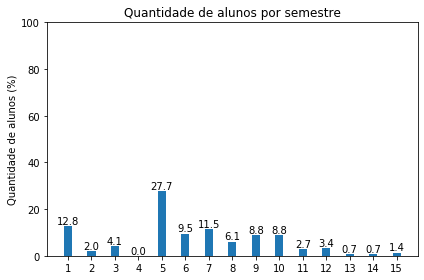

In [33]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [34]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [35]:
aux

{'APROVADO': 0.7297297297297297,
 'TRANCADO': 0.006756756756756757,
 'INDEFERIDO': 0.10810810810810811,
 'REPROVADO': 0.006756756756756757,
 'EXCLUIDA': 0.013513513513513514,
 'DISPENSADO': 0.13513513513513514}

### Analisando SERIES E EDO

In [36]:
codigo = codigos_disciplinas[1]

In [37]:
print(relatorio[1]['nome'])

alunos_nao_rec = relatorio[1]['alunos_nao_rec']

alunos_nao_rec

SERIES E EQUACOES DIF ORDINARIAS


[10721015,
 10811031,
 10811041,
 10811057,
 10811434,
 10811438,
 10811443,
 10821055,
 10821057,
 10821063,
 10821251,
 10821258,
 10821361,
 10911036,
 10911040,
 10911042,
 10911044,
 10911054,
 10911068,
 10911075,
 10911649,
 10911653,
 10921054,
 10921056,
 10921059,
 10921063,
 10921064,
 10921069,
 10921071,
 10921072,
 10921073,
 10921360,
 10921363,
 10921372,
 10921373,
 10921378,
 10921379,
 11011053,
 11011060,
 11011061,
 11011062,
 11011065,
 11011068,
 11011073,
 11011087,
 11011089,
 11011828,
 11011829,
 11011830,
 11011833,
 11011836,
 11021057,
 11021059,
 11021061,
 11021063,
 11021067,
 11021068,
 11021445,
 11021452,
 11021593,
 11021633,
 11021645,
 11111285,
 11111298,
 11111299,
 11111303,
 11111309,
 11111314,
 11111316,
 11111321,
 11118146,
 11118199,
 11118202,
 11118203,
 11118204,
 11118207,
 11118209,
 11121191,
 11121212,
 11121216,
 11121217,
 11121219,
 11121220,
 11121223,
 11121694,
 11121697,
 11121705,
 11121911,
 11121912,
 11121914,
 11128089,

In [38]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
536   10721015  8.08            2007.2  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
13753   10721015             2011.1           1103180  TRANCADO          NaN
13759   10721015             2011.2           1103180  APROVADO          6.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
541   10811031  8.65            2008.1  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
13948   10811031             2011.1           1103180  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
539   10811041  8.66            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14077   10811041             2011.2           1103180  APROVADO          8.7

     matricula   cra  periodo_ingresso  desc

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
573   10921069  7.87            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15682   10921069             2013.1           1103180  APROVADO          8.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
564   10921071  8.69            2009.2  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15741   10921071             2013.1           1103180  APROVADO          7.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
568   10921072  6.82            2009.2  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15777   10921072             2012.1           1103180  TRANCADO          NaN
15796   10921072             2013.2           1103180  APROVADO          5.0

     matricula   cra  periodo_ingresso  desc

       matricula  periodo_matricula codigo_componente   descricao  media_final
18097   11021593             2016.1           1103180  INDEFERIDO          NaN
18100   11021593             2016.1           1103180    APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
612   11021633  7.83            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18154   11021633             2013.1           1103180  TRANCADO          NaN
18171   11021633             2015.2           1103180  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
602   11021645  8.59            2010.2  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18274   11021645             2011.2           1103180  APROVADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
619   11111285  9.03          

       matricula  periodo_matricula codigo_componente   descricao  media_final
20119   11121705             2016.1           1103180  INDEFERIDO          NaN
20121   11121705             2016.1           1103180    APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
639   11121911  5.59            2011.2  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20168   11121911             2014.2           1103180   REPROVADO          3.2
20185   11121911             2015.2           1103180  INDEFERIDO          NaN
20190   11121911             2016.1           1103180    APROVADO          5.8
20192   11121911             2016.1           1103180  INDEFERIDO          NaN

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
632   11121912  6.34            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20253   11121

       matricula  periodo_matricula codigo_componente descricao  media_final
22066   11311007             2015.2           1103180  APROVADO          9.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
675   11311009  7.94            2013.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
22111   11311009             2015.1           1103180    TRANCADO          NaN
22129   11311009             2016.2           1103180    TRANCADO          NaN
22137   11311009             2017.1           1103180  INDEFERIDO          NaN
22139   11311009             2017.1           1103180  INDEFERIDO          NaN
22145   11311009             2017.2           1103180    APROVADO          6.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
672   11311014  7.57            2013.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
22194   1131101

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
534   10721026  8.8            2007.2  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
13864   10721026             2011.2           1103180  DISPENSADO          7.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
533   10721244  7.27            2007.2  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
13918   10721244             2011.2           1103180  DISPENSADO          5.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
597   11011091  8.35            2010.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
16872   11011091             2011.1           1103180  DISPENSADO          7.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
595   11011827  8.64            2010.1  CO

In [39]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [40]:
aux

[0.06535947712418301,
 0.013071895424836602,
 0.0392156862745098,
 0.0,
 0.08496732026143791,
 0.05228758169934641,
 0.0718954248366013,
 0.1503267973856209,
 0.13071895424836602,
 0.16339869281045752,
 0.10457516339869281,
 0.09803921568627451,
 0.006535947712418301,
 0.013071895424836602,
 0.006535947712418301]

In [41]:
sum(aux)

0.9999999999999998

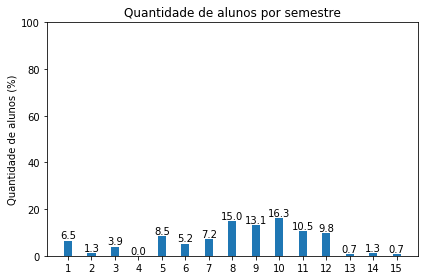

In [42]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [43]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [44]:
aux

{'TRANCADO': 0.0784313725490196,
 'APROVADO': 0.5032679738562091,
 'REPROVADO': 0.1568627450980392,
 'REP. FALTA': 0.032679738562091505,
 'INDEFERIDO': 0.0784313725490196,
 'DISPENSADO': 0.1503267973856209}

### Analisando ARQUITETURA I

In [45]:
codigo = codigos_disciplinas[2]

In [46]:
print(relatorio[2]['nome'])

alunos_nao_rec = relatorio[2]['alunos_nao_rec']

alunos_nao_rec

ARQUITETURA DE COMPUTADORES I


[10611015,
 10611431,
 10621020,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711032,
 10711466,
 10711469,
 10721006,
 10721015,
 10721026,
 10721244,
 10811031,
 10821055,
 10821060,
 10821063,
 10821251,
 10821361,
 10921363,
 10921372,
 11011065,
 11011835,
 11021057,
 11021067,
 11021068,
 11021452,
 11021593,
 11021633,
 11111298,
 11111309,
 11111316,
 11111322,
 11118146,
 11118199,
 11118202,
 11118203,
 11118204,
 11118209,
 11121212,
 11121911,
 11121912,
 11218354,
 11218638,
 11218640,
 11218649,
 11218797,
 11221998,
 11228207,
 11311009,
 11318705,
 11512971,
 11514334,
 10621235,
 10711029,
 10911646,
 11011091,
 11021645,
 11111299,
 11121218,
 11128089,
 11211054,
 11211413,
 11218275,
 11221262,
 11228204,
 11311014,
 11321685,
 11328180,
 11403755,
 11403784,
 11409514,
 11427671,
 11500552,
 11508347,
 11508370,
 11511184]

In [47]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11188   10611015             2008.2           1107108  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
485   10611431  8.28            2006.1  CONCLUÍDO             2008.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11609   10611431             2006.2           1107108  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
513   10621020  6.49            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12148   10621020             2008.2           1107108  APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
518   10711005  9.16            2007.1  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
600   11021452  8.38            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18001   11021452             2012.2           1107108  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
606   11021593  4.94            2010.2  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18061   11021593             2013.1           1107108  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
612   11021633  7.83            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18147   11021633             2012.2           1107108  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
621   11111298  6.65            2011.1  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente   descricao  media_final
13308   10711029             2009.2           1107108  DISPENSADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
559   10911646  7.64            2009.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
15209   10911646             2009.1           1107108  DISPENSADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
597   11011091  8.35            2010.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
16852   11011091             2010.1           1107108  DISPENSADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
602   11021645  8.59            2010.2  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
18243   11021645             2

In [48]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [49]:
aux

[0.25316455696202533,
 0.05063291139240506,
 0.0759493670886076,
 0.0,
 0.379746835443038,
 0.11392405063291139,
 0.0379746835443038,
 0.05063291139240506,
 0.0379746835443038]

In [50]:
sum(aux)

1.0

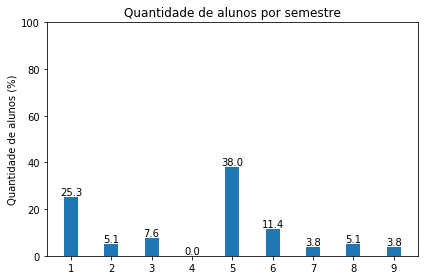

In [51]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [52]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [53]:
aux

{'APROVADO': 0.620253164556962,
 'REP. FALTA': 0.0379746835443038,
 'TRANCADO': 0.012658227848101266,
 'EXCLUIDA': 0.02531645569620253,
 'DISPENSADO': 0.3037974683544304}

### Analisando PDI

In [54]:
codigo = codigos_disciplinas[3]

In [55]:
codigo

'1107196'

In [56]:
print(relatorio[3]['nome'])

alunos_nao_rec = relatorio[3]['alunos_nao_rec']

alunos_nao_rec

INTRODUCAO AO PROC DIGITAL DE IMAGENS


[10611015,
 10611440,
 10621015,
 10621017,
 10621018,
 10621020,
 10621022,
 10621028,
 10621030,
 10621239,
 10621243,
 10621363,
 10621364,
 10621367,
 10711005,
 10711011,
 10711012,
 10711013,
 10711018,
 10711021,
 10711027,
 10711028,
 10711029,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10721015,
 10721022,
 10721026,
 10721244,
 10811031,
 10811060,
 10811437,
 10821055,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911042,
 10911054,
 10911649,
 10911653,
 10921063,
 10921072,
 10921360,
 10921363,
 10921372,
 10921378,
 11011060,
 11011065,
 11011068,
 11011087,
 11011089,
 11011829,
 11011830,
 11011833,
 11011836,
 11021057,
 11021059,
 11021060,
 11021061,
 11021063,
 11021067,
 11021068,
 11021069,
 11021072,
 11021432,
 11021439,
 11021445,
 11021452,
 11021593,
 11021633,
 11021635,
 11111298,
 11111299,
 11111309,
 11111314,
 11111316,
 11111322,
 11118146,
 11118199,
 11118203,
 11118204,
 11118209,
 11121191,
 11121212,
 11121216,

In [57]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11192   10611015             2008.2           1107196  APROVADO         6.26

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11814   10611440             2009.1           1107196  APROVADO          6.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11994   10621015             2009.2           1107196  APROVADO         7.23

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
501   10621017  8.05            2006.2  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
533   10721244  7.27            2007.2  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
13915   10721244             2011.2           1107196  APROVADO         6.46

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
541   10811031  8.65            2008.1  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
13951   10811031             2011.2           1107196  APROVADO         8.89

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
545   10811060  8.56            2008.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
14169   10811060             2010.1           1107196  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
542   10811437  8.63            2008.1  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
17124   11011833             2012.1           1107196  APROVADO          8.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
585   11011836  7.35            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17242   11011836             2012.2           1107196  APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
610   11021057  6.83            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17317   11021057             2014.2           1107196  TRANCADO          NaN
17330   11021057             2015.2           1107196  APROVADO          7.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
609   11021059  6.98            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_c

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
642   11121191  5.98            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19422   11121191             2016.2           1107196  APROVADO          7.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
643   11121212  7.5            2011.2  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
19470   11121212             2015.1           1107196   TRANCADO          NaN
19479   11121212             2015.2           1107196  REPROVADO          2.7
19482   11121212             2016.1           1107196   TRANCADO          NaN
19489   11121212             2016.2           1107196   APROVADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
635   11121216  6.48            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo

       matricula  periodo_matricula codigo_componente descricao  media_final
21875   11221998             2018.1           1107196  APROVADO          5.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
667   11228207  6.58            2012.2  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22022   11228207             2017.2           1107196  APROVADO          8.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
676   11311007  8.94            2013.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22071   11311007             2016.1           1107196  APROVADO          8.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
675   11311009  7.94            2013.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
22131   11311009             2016.2         

       matricula  periodo_matricula codigo_componente   descricao  media_final
22962   11403755             2014.1           1107196  DISPENSADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
701   11508370  7.86            2015.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
23783   11508370             2015.1           1107196  DISPENSADO         7.49



In [58]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [59]:
aux

[0.06666666666666667,
 0.02,
 0.03333333333333333,
 0.0,
 0.15333333333333332,
 0.12,
 0.06666666666666667,
 0.14,
 0.1,
 0.09333333333333334,
 0.12666666666666668,
 0.05333333333333334,
 0.006666666666666667,
 0.013333333333333334,
 0.006666666666666667]

In [60]:
sum(aux)

1.0

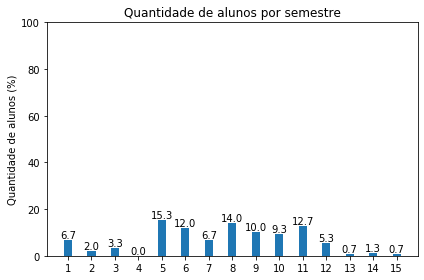

In [61]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [62]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [63]:
aux

{'APROVADO': 0.8333333333333334,
 'REP. FALTA': 0.04,
 'TRANCADO': 0.06,
 'REPROVADO': 0.013333333333333334,
 'EXCLUIDA': 0.006666666666666667,
 'DISPENSADO': 0.04666666666666667}

### Analisando FORMAIS

In [64]:
codigo = codigos_disciplinas[4]

In [65]:
print(relatorio[4]['nome'])

alunos_nao_rec = relatorio[4]['alunos_nao_rec']

alunos_nao_rec

LINGUAGENS FORMAIS E AUTOMATOS


[10611004,
 10611011,
 10611013,
 10611014,
 10611015,
 10611022,
 10611023,
 10611026,
 10611029,
 10611434,
 10611437,
 10611440,
 10621017,
 10621020,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711029,
 10711032,
 10711466,
 10711469,
 10721015,
 10721022,
 10721026,
 10821063,
 10821251,
 10921063,
 10921072,
 10921360,
 10921363,
 10921372,
 10921378,
 11011057,
 11011065,
 11011068,
 11011073,
 11011087,
 11011089,
 11021057,
 11021059,
 11021068,
 11111298,
 11111303,
 11111309,
 11111314,
 11111321,
 11111322,
 11118146,
 11118199,
 11118204,
 11118207,
 11118209,
 11121216,
 11121223,
 11121694,
 11121705,
 11121911,
 11211414,
 11211425,
 11218354,
 11218562,
 11218638,
 11218640,
 11218649,
 11218797,
 11218799,
 11221240,
 11221998,
 11228207,
 11311014,
 11311862,
 11318705,
 11318739,
 11408104,
 11427671,
 11500983,
 11511184,
 11512971,
 11514334,
 10811031,
 10911646,
 11011091,
 11111299,
 11121218,
 11211054,
 11211413,
 11218275,
 11221262,
 11228204,

In [66]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
500   10611004  8.57            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
10954   10611004             2009.1           1107199  APROVADO         8.05

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
486   10611011  8.77            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11055   10611011             2009.1           1107199  APROVADO          7.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
483   10611013  8.36            2006.1  CONCLUÍDO             2010.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11103   10611013             2009.1           1107199  APROVADO          6.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
497   10611014  8.67            2006.1  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
553   10821251  6.49            2008.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
14690   10821251             2012.2           1107199  APROVADO          7.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
578   10921063  5.76            2009.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15572   10921063             2013.2           1107199  APROVADO          5.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
568   10921072  6.82            2009.2  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15770   10921072             2011.2           1107199  TRANCADO          NaN
15776   10921072             2012.1           1107199  APROVADO          7.1

     matricula   cra  periodo_ingresso  desc

       matricula  periodo_matricula codigo_componente descricao  media_final
19523   11121216             2014.1           1107199  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
631   11121223  6.62            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19879   11121223             2014.2           1107199  APROVADO          8.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
644   11121694  6.43            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
19938   11121694             2013.2           1107199  REPROVADO          4.8
19956   11121694             2014.2           1107199   APROVADO          8.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
634   11121705  6.27            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codig


     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
559   10911646  7.64            2009.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
15206   10911646             2009.1           1107199  DISPENSADO          6.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
597   11011091  8.35            2010.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
16851   11011091             2010.1           1107199  DISPENSADO          8.2

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
616   11111299  8.4            2011.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
18403   11111299             2011.1           1107199  DISPENSADO          9.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
641   11121218  7.57            2011.2  C

In [67]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [68]:
aux

[0.1919191919191919,
 0.010101010101010102,
 0.06060606060606061,
 0.0,
 0.1717171717171717,
 0.2222222222222222,
 0.1717171717171717,
 0.09090909090909091,
 0.030303030303030304,
 0.020202020202020204,
 0.020202020202020204,
 0.010101010101010102]

In [69]:
sum(aux)

1.0

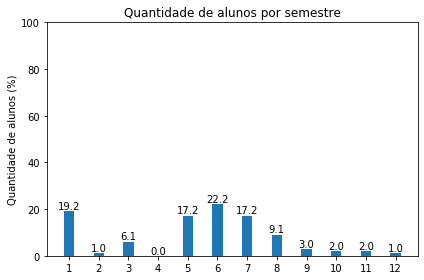

In [70]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [71]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [72]:
aux

{'APROVADO': 0.6666666666666666,
 'TRANCADO': 0.04040404040404041,
 'REP. FALTA': 0.0707070707070707,
 'REPROVADO': 0.020202020202020204,
 'EXCLUIDA': 0.020202020202020204,
 'DISPENSADO': 0.18181818181818182}

### Analisando ORDENAÇÃO

In [73]:
codigo = codigos_disciplinas[5]

In [74]:
print(relatorio[5]['nome'])

alunos_nao_rec = relatorio[5]['alunos_nao_rec']

alunos_nao_rec

ORDENACAO E RECUPERACAO DE DADOS


[10611440,
 10621014,
 10621015,
 10621020,
 10621022,
 10621028,
 10621030,
 10621239,
 10621243,
 10621363,
 10621364,
 10621367,
 10711005,
 10711013,
 10711018,
 10711021,
 10711027,
 10711029,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10721015,
 10721026,
 10721244,
 10811031,
 10811041,
 10811057,
 10811434,
 10811443,
 10821060,
 10821063,
 10821251,
 10821361,
 10911036,
 10911040,
 10911042,
 10911044,
 10911054,
 10911068,
 10911075,
 10911646,
 10911649,
 10911653,
 10921054,
 10921059,
 10921063,
 10921064,
 10921069,
 10921071,
 10921072,
 10921073,
 10921360,
 10921372,
 10921373,
 10921378,
 10921379,
 11011057,
 11011061,
 11011065,
 11011068,
 11011073,
 11011087,
 11011827,
 11011828,
 11011829,
 11011835,
 11011836,
 11021057,
 11021059,
 11021063,
 11021067,
 11021068,
 11021445,
 11021593,
 11021633,
 11021645,
 11111298,
 11111309,
 11111316,
 11118146,
 11118199,
 11118204,
 11118209,
 11121191,
 11121216,
 11121217,
 11121219,
 11121223,
 11121694,

In [75]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11813   10611440             2009.1           1107204  APROVADO          6.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
505   10621014  7.83            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11932   10621014             2008.2           1107204  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11986   10621015             2009.1           1107204  APROVADO          8.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
513   10621020  6.49            2006.2  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
13962   10811031             2012.1           1107204  APROVADO          9.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
539   10811041  8.66            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14056   10811041             2010.1           1107204  APROVADO          7.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
538   10811057  8.75            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14113   10811057             2010.1           1107204  APROVADO          8.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
544   10811434  8.75            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14216   10811434             2010.1         

       matricula  periodo_matricula codigo_componente descricao  media_final
16072   10921373             2011.2           1107204  APROVADO          9.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
577   10921378  6.73            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16148   10921378             2013.1           1107204  APROVADO          7.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
566   10921379  8.82            2009.2  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16194   10921379             2011.2           1107204  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
582   11011057  8.42            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
16347   11011057             2012.1         

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
638   11121219  6.75            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19741   11121219             2014.1           1107204  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
631   11121223  6.62            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19870   11121223             2014.1           1107204  APROVADO         7.64

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
644   11121694  6.43            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19946   11121694             2014.1           1107204  APROVADO         7.85

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
637   11121697  7.47            2011.2  CONCLUÍDO   

     matricula   cra  periodo_ingresso         descricao  periodo_conclusao
702   11514334  8.49            2015.2  ATIVO - FORMANDO             2018.2
       matricula  periodo_matricula codigo_componente descricao  media_final
23971   11514334             2016.2           1107204  APROVADO          5.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
597   11011091  8.35            2010.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
16833   11011091             2010.1           1107204  DISPENSADO          8.2

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
616   11111299  8.4            2011.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
18442   11111299             2011.2           1107204  DISPENSADO          7.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
641   11121218  7.57            

In [76]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [77]:
aux

[0.1297709923664122,
 0.022900763358778626,
 0.04580152671755725,
 0.0,
 0.44274809160305345,
 0.22137404580152673,
 0.061068702290076333,
 0.03816793893129771,
 0.030534351145038167,
 0.007633587786259542]

In [78]:
sum(aux)

1.0

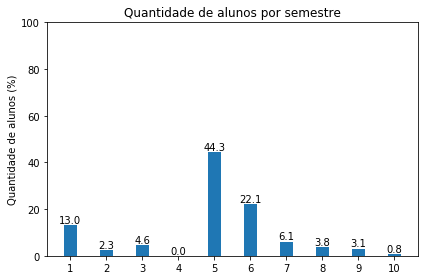

In [79]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [80]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [81]:
aux

{'APROVADO': 0.8320610687022901,
 'REP. FALTA': 0.03816793893129771,
 'REPROVADO': 0.030534351145038167,
 'DISPENSADO': 0.09923664122137404}

In [82]:
sum(aux.values())

1.0

### Analisando MODELOS

In [83]:
codigo = codigos_disciplinas[6]

In [84]:
print(relatorio[6]['nome'])

alunos_nao_rec = relatorio[6]['alunos_nao_rec']

alunos_nao_rec

MODELOS PROBABILÍSTICOS P COMPUTAÇÃO


[10621015,
 10621020,
 10621239,
 10711011,
 10711012,
 10711018,
 10711021,
 10711029,
 10711466,
 10711469,
 10721015,
 10811031,
 10811041,
 10811057,
 10811434,
 10811443,
 10821057,
 10821063,
 10821251,
 10821258,
 10911036,
 10911040,
 10911054,
 10911068,
 10911075,
 10911653,
 10921054,
 10921056,
 10921059,
 10921063,
 10921064,
 10921069,
 10921071,
 10921072,
 10921073,
 10921360,
 10921363,
 10921372,
 10921373,
 10921378,
 10921379,
 11011057,
 11011060,
 11011062,
 11011065,
 11011068,
 11011073,
 11011087,
 11011089,
 11011829,
 11011830,
 11011833,
 11011836,
 11021057,
 11021059,
 11021060,
 11021063,
 11021067,
 11021068,
 11021432,
 11021445,
 11021593,
 11021633,
 11021635,
 11021645,
 11111298,
 11111309,
 11111314,
 11111316,
 11111322,
 11118146,
 11118199,
 11118204,
 11118209,
 11121191,
 11121216,
 11121217,
 11121218,
 11121219,
 11121220,
 11121223,
 11121694,
 11121705,
 11121911,
 11121912,
 11121914,
 11128089,
 11211410,
 11211414,
 11211416,
 11211422,

In [85]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
12014   10621015             2011.2           1108183  REP. FALTA          0.0
12016   10621015             2012.1           1108183    APROVADO          7.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
513   10621020  6.49            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12177   10621020             2010.2           1108183  APROVADO          8.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
514   10621239  7.38            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente  descricao  media_final
12461   10621239             2010.1           1108183  REPROVADO          4.6
12463   10621239             2010.2  

       matricula  periodo_matricula codigo_componente descricao  media_final
15462   10921056             2013.2           1108183  APROVADO         8.17

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
575   10921059  8.11            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15494   10921059             2012.1           1108183  APROVADO          7.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
578   10921063  5.76            2009.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente  descricao  media_final
15552   10921063             2012.2           1108183  REPROVADO         1.30
15566   10921063             2013.2           1108183   APROVADO         5.08

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
572   10921064  8.83            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codig

       matricula  periodo_matricula codigo_componente descricao  media_final
17534   11021063             2013.1           1108183  TRANCADO          NaN
17545   11021063             2015.2           1108183  APROVADO          7.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
613   11021067  7.93            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17580   11021067             2012.2           1108183  APROVADO          8.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
607   11021068  5.6            2010.2  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
17649   11021068             2012.2           1108183  REP. FALTA         0.00
17655   11021068             2013.1           1108183    APROVADO         7.04

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
601   11021432  9.01            

       matricula  periodo_matricula codigo_componente  descricao  media_final
19950   11121694             2014.1           1108183  REPROVADO          3.3
19971   11121694             2015.2           1108183  REPROVADO          2.5
19984   11121694             2016.2           1108183  REPROVADO          4.2
19989   11121694             2017.1           1108183   APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
634   11121705  6.27            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20081   11121705             2014.1           1108183  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
639   11121911  5.59            2011.2  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20162   11121911             2014.1           1108183  APROVADO          5.0

     matricula   cra  p

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
678   11318705  7.79            2013.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
22446   11318705             2014.1           1108183  APROVADO          6.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
673   11318739  7.54            2013.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
22536   11318739             2016.2           1108183  TRANCADO          NaN
22547   11318739             2017.1           1108183  APROVADO          7.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
679   11321685  7.59            2013.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22620   11321685             2013.2           1108183  EXCLUIDA          NaN
22648   11321685             2014.2          

In [86]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [87]:
aux

[0.08759124087591241,
 0.0072992700729927005,
 0.021897810218978103,
 0.0,
 0.17518248175182483,
 0.1678832116788321,
 0.1897810218978102,
 0.072992700729927,
 0.12408759124087591,
 0.058394160583941604,
 0.043795620437956206,
 0.021897810218978103,
 0.014598540145985401,
 0.0,
 0.014598540145985401]

In [88]:
sum(aux)

0.9999999999999999

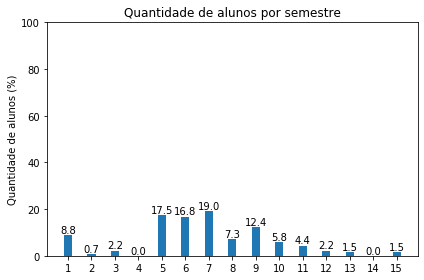

In [89]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [90]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [91]:
aux

{'REP. FALTA': 0.051094890510948905,
 'APROVADO': 0.6423357664233577,
 'REPROVADO': 0.13138686131386862,
 'TRANCADO': 0.058394160583941604,
 'EXCLUIDA': 0.029197080291970802,
 'DISPENSADO': 0.08759124087591241}

In [92]:
sum(aux.values())

1.0

### Analisando INGLES

In [93]:
codigo = codigos_disciplinas[7]

In [94]:
print(relatorio[7]['nome'])

alunos_nao_rec = relatorio[7]['alunos_nao_rec']

alunos_nao_rec

LINGUA INGLESA I


[10611437,
 10711032,
 10711469,
 10811037,
 10821055,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911036,
 10911040,
 10911044,
 10911054,
 10911068,
 10911649,
 10911653,
 10921063,
 10921064,
 10921069,
 10921072,
 10921360,
 10921363,
 10921372,
 11011050,
 11011057,
 11011060,
 11011061,
 11011062,
 11011065,
 11011068,
 11011073,
 11011089,
 11011828,
 11011829,
 11011830,
 11011833,
 11011835,
 11011836,
 11021059,
 11021060,
 11021061,
 11021063,
 11021067,
 11021069,
 11021072,
 11021432,
 11021439,
 11021445,
 11021452,
 11021593,
 11021633,
 11021635,
 11111285,
 11111303,
 11111309,
 11118146,
 11118207,
 11121191,
 11121212,
 11121219,
 11121220,
 11121223,
 11121705,
 11121911,
 11121914,
 11211054,
 11211410,
 11211414,
 11211422,
 11211425,
 11218275,
 11218354,
 11218638,
 11218640,
 11218646,
 11218649,
 11218650,
 11218797,
 11218799,
 11221240,
 11228207,
 11311007,
 11311009,
 11311014,
 11311018,
 11311469,
 11318739,
 11318839,
 11328275,

In [95]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
498   10611437  8.55            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11705   10611437             2008.2           1404138  APROVADO          9.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
526   10711032  6.84            2007.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
13443   10711032             2011.2           1404138  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
521   10711469  6.36            2007.1  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente descricao  media_final
13585   10711469             2009.1           1404138  APROVADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
540   10811037  8.86            2008.1  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
16626   11011068             2012.2           1404138  APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
583   11011073  7.86            2010.1  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16681   11011073             2012.1           1404138  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
590   11011089  6.15            2010.1  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
16812   11011089             2014.1           1404138  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
580   11011828  8.83            2010.1  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16967   11011828             2012.2         

       matricula  periodo_matricula codigo_componente descricao  media_final
19724   11121219             2012.2           1404138  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
633   11121220  8.23            2011.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19837   11121220             2015.2           1404138  INDEFERIDO          NaN
19839   11121220             2016.1           1404138    APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
631   11121223  6.62            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19886   11121223             2015.1           1404138  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
634   11121705  6.27            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula co

       matricula  periodo_matricula codigo_componente descricao  media_final
22851   11403718             2014.2           1404138  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
689   11403744  9.49            2014.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22904   11403744             2014.1           1404138  APROVADO         10.0

     matricula  cra  periodo_ingresso         descricao  periodo_conclusao
684   11403767  8.7            2014.1  ATIVO - FORMANDO             2018.2
       matricula  periodo_matricula codigo_componente descricao  media_final
23014   11403767             2014.1           1404138  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
688   11408104  8.22            2014.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
23151   11408104             201

       matricula  periodo_matricula codigo_componente   descricao  media_final
12440   10621239             2008.2           1404138  DISPENSADO          8.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
502   10621243  6.52            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
12489   10621243             2007.2           1404138  DISPENSADO          9.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
503   10621363  7.13            2006.2  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
12589   10621363             2009.2           1404138  DISPENSADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
506   10621364  7.65            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
12649   10621364             2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
567   10921054  7.97            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
15385   10921054             2011.2           1404138  DISPENSADO          9.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
575   10921059  8.11            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
15469   10921059             2009.2           1404138  DISPENSADO          9.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
564   10921071  8.69            2009.2  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
15704   10921071             2010.2           1404138  DISPENSADO          9.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
569   10921073  8.55            2009.2  

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
701   11508370  7.86            2015.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
23795   11508370             2015.1           1404138  DISPENSADO          9.8

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
699   11511184  7.1            2015.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
23835   11511184             2015.1           1404138  DISPENSADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
696   11512971  7.98            2015.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
23892   11512971             2015.1           1404138  DISPENSADO          8.0

     matricula   cra  periodo_ingresso         descricao  periodo_conclusao
702   11514334  8.49            201

In [96]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [97]:
aux

[0.28804347826086957,
 0.14130434782608695,
 0.08695652173913043,
 0.0,
 0.15760869565217392,
 0.09782608695652174,
 0.07608695652173914,
 0.07065217391304347,
 0.04891304347826087,
 0.02717391304347826,
 0.005434782608695652]

In [98]:
sum(aux)

1.0

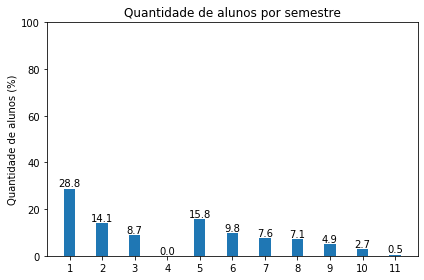

In [99]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [100]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [101]:
aux

{'APROVADO': 0.5217391304347826,
 'REP. FALTA': 0.010869565217391304,
 'INDEFERIDO': 0.010869565217391304,
 'EXCLUIDA': 0.005434782608695652,
 'DISPENSADO': 0.44565217391304346,
 'TRANCADO': 0.005434782608695652}

In [102]:
sum(aux.values())

1.0